In [1]:
from IPython.display import display
import mglearn

In [2]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X, y = make_blobs(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression().fit(X_train, y_train)
print("Test set score: {:.2f}".format(logreg.score(X_test, y_test)))

Test set score: 0.88


/Users/sunwoongkim/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:2648: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0
  ret = ax.barh(*args, **kwargs)


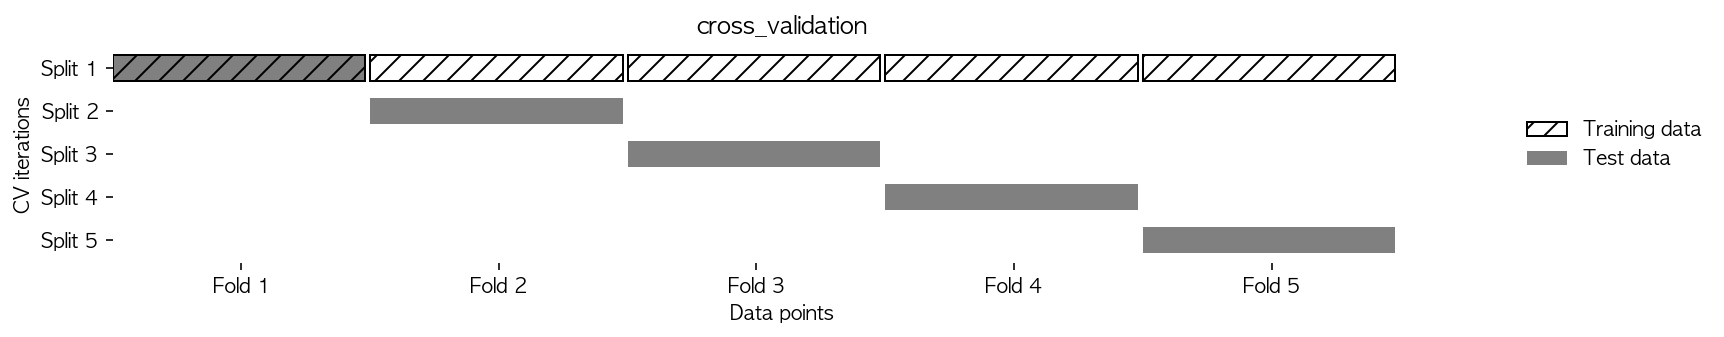

In [3]:
mglearn.plots.plot_cross_validation()

In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression()

scores = cross_val_score(logreg, iris.data, iris.target)
print("Cross validation score: {}".format(scores))

Cross validation score: [ 0.96078431  0.92156863  0.95833333]


In [5]:
scores = cross_val_score(logreg, iris.data, iris.target, cv=5)
print("Cross validation score: {}".format(scores))

Cross validation score: [ 1.          0.96666667  0.93333333  0.9         1.        ]


In [6]:
print("Average cv score: {:.2f}".format(scores.mean()))

Average cv score: 0.96


In [7]:
print("Iris labels:\n{}".format(iris.target))

Iris labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


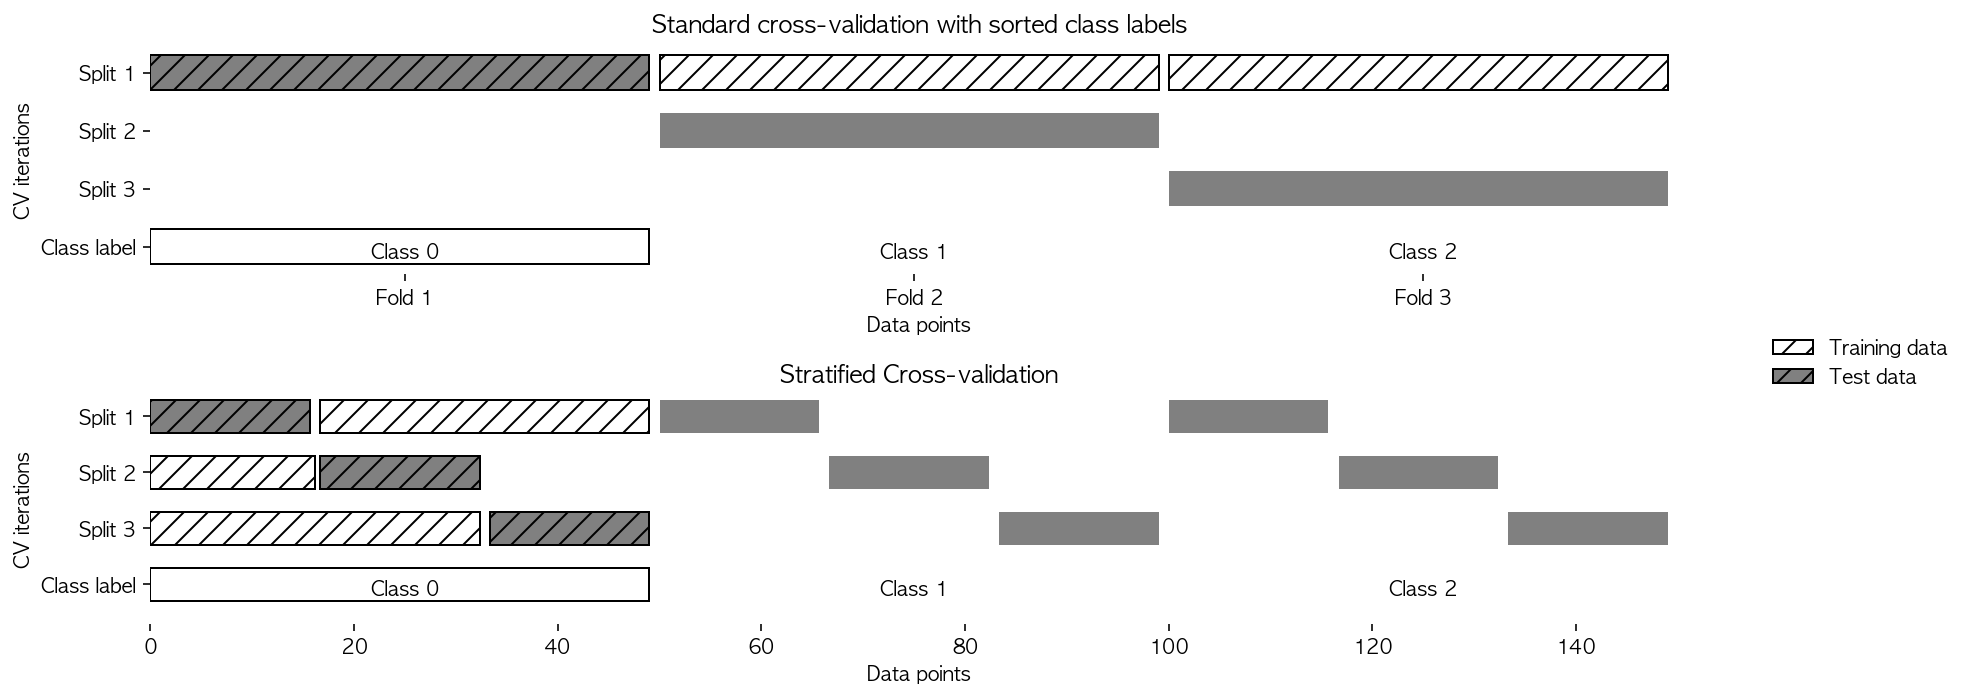

In [8]:
mglearn.plots.plot_stratified_cross_validation()

In [9]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

In [10]:
print("CV scores:\n{}".format(cross_val_score(
    logreg, iris.data, iris.target, cv=kfold)))

CV scores:
[ 1.          0.93333333  0.43333333  0.96666667  0.43333333]


In [11]:
kfold = KFold(n_splits=3)
print("CV scores:\n{}".format(cross_val_score(
    logreg, iris.data, iris.target, cv=kfold)))

CV scores:
[ 0.  0.  0.]


In [12]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print("CV scores:\n{}".format(cross_val_score(
    logreg, iris.data, iris.target, cv=kfold)))

CV scores:
[ 0.9   0.96  0.96]


In [13]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print("CV: ", len(scores))
print("Average CV Score: {:.2f}".format(scores.mean()))

CV:  150
Average CV Score: 0.95


/Users/sunwoongkim/anaconda3/lib/python3.6/site-packages/mglearn/plot_cross_validation.py:85: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0
  hatch="//", edgecolor='k', align='edge')


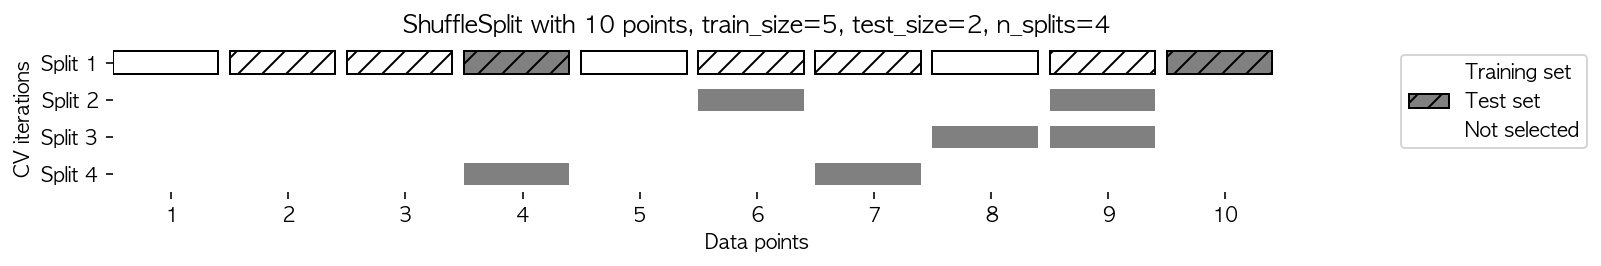

In [14]:
mglearn.plots.plot_shuffle_split()

In [15]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print("CV scores:\n{}".format(scores))

CV scores:
[ 0.90666667  0.93333333  0.94666667  0.90666667  0.84        0.88
  0.97333333  0.96        0.96        0.94666667]


In [16]:
from sklearn.model_selection import GroupKFold
X, y = make_blobs(n_samples=12, random_state=0)
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(logreg, X, y, groups, cv=GroupKFold(n_splits=3))
print("CV scores:\n{}".format(scores))

CV scores:
[ 0.75        0.8         0.66666667]


/Users/sunwoongkim/anaconda3/lib/python3.6/site-packages/mglearn/plot_cross_validation.py:33: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0
  hatch="//", edgecolor="k", align='edge')
/Users/sunwoongkim/anaconda3/lib/python3.6/site-packages/mglearn/plot_cross_validation.py:39: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0
  color="w", edgecolor='k', align="edge")


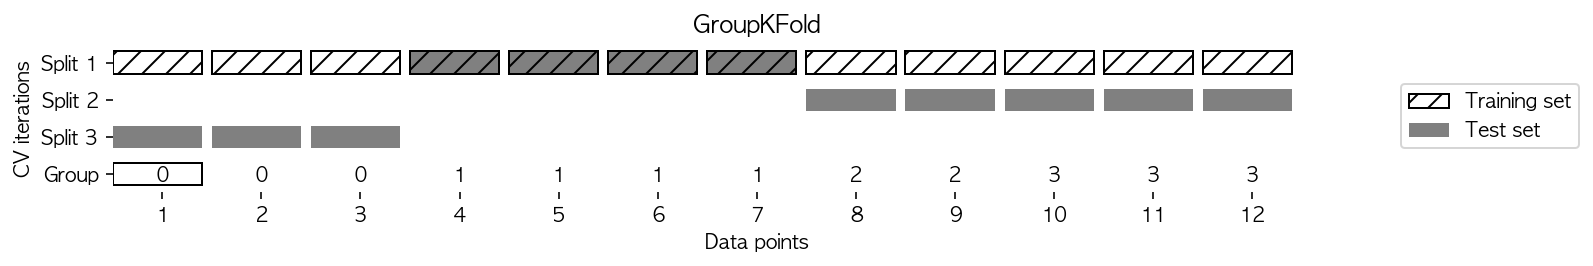

In [17]:
mglearn.plots.plot_group_kfold()

In [18]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=0)
print("Length of train set: {} Length of test set: {}".format(
    X_train.shape[0], X_test.shape[0]))

best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        score = svm.score(X_test, y_test)
        if score > best_score:
            best_score = score
            best_parameters = {"C": C, "gamma": gamma}
            
print("Best Score: {:.2f}".format(best_score))
print("Best Parameter: {}".format(best_parameters))

Length of train set: 112 Length of test set: 38
Best Score: 0.97
Best Parameter: {'C': 100, 'gamma': 0.001}


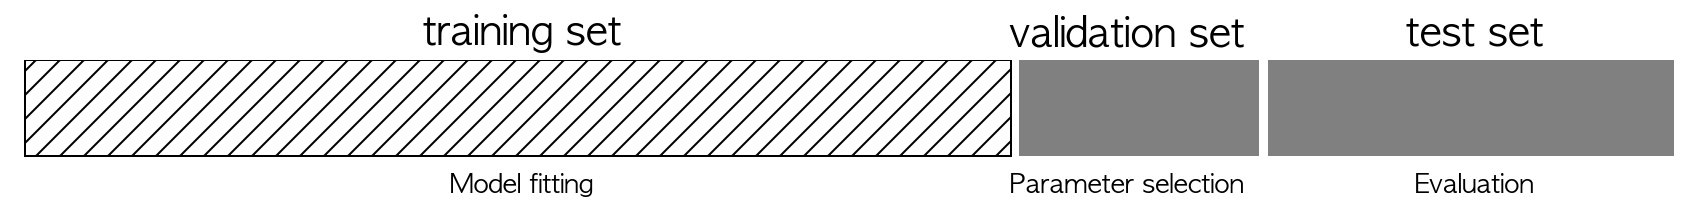

In [19]:
mglearn.plots.plot_threefold_split()

In [20]:
from sklearn.svm import SVC

X_trainval, X_test, y_trainval, y_test = train_test_split(
    iris.data, iris.target, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_trainval, y_trainval, random_state=1)
print("Length of train set: {} Length of validation set: {} Length of test set: {}\n".format(
    X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        score = svm.score(X_valid, y_valid)
        if score > best_score:
            best_score = score
            best_parameters = {"C": C, "gamma": gamma}

svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("Best score in validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test score using best parameters: {:.2f}".format(test_score))

Length of train set: 84 Length of validation set: 28 Length of test set: 38

Best score in validation set: 0.96
Best parameters:  {'C': 10, 'gamma': 0.001}
Test score using best parameters: 0.92


In [21]:
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        score = np.mean(scores)
        if score > best_score:
            best_score = score
            best_parameters = {"C": C, "gamma": gamma}
        
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

/Users/sunwoongkim/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/sunwoongkim/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/sunwoongkim/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/sunwoong

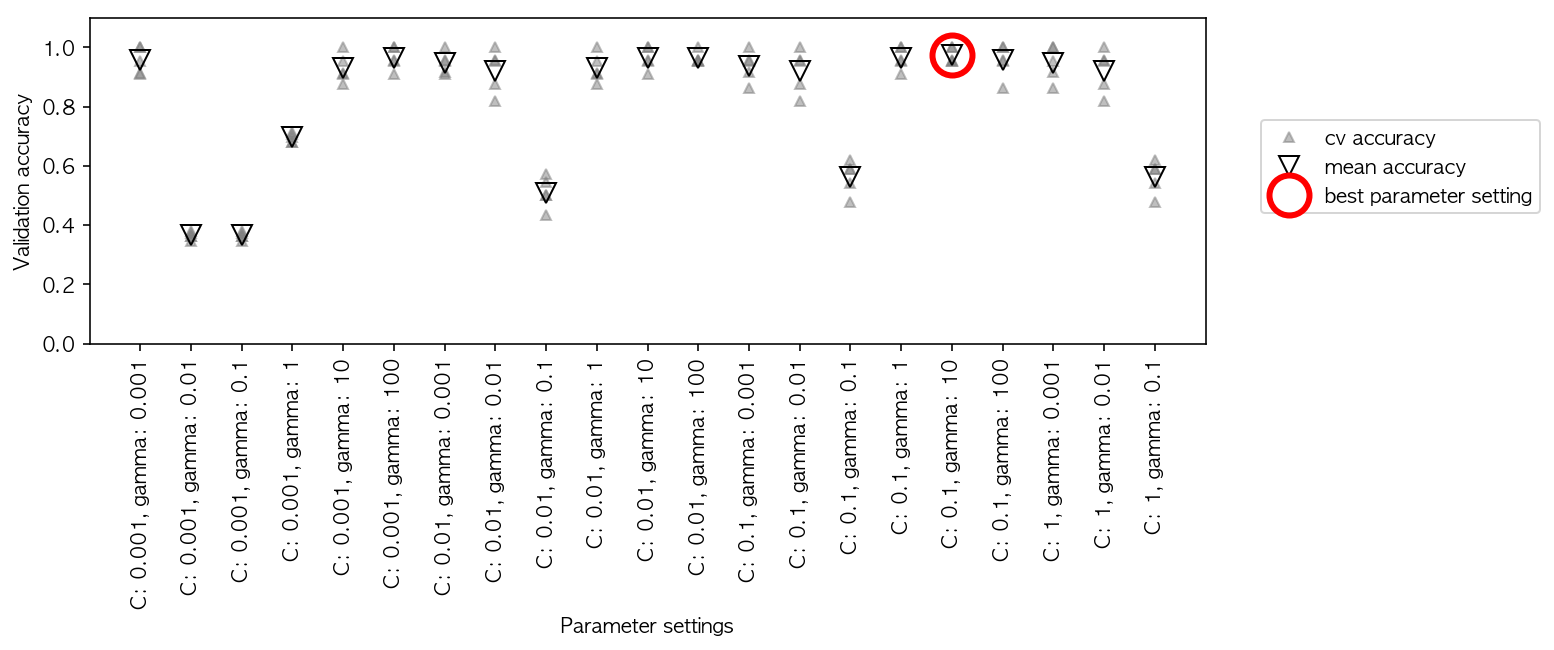

In [22]:
mglearn.plots.plot_cross_val_selection()

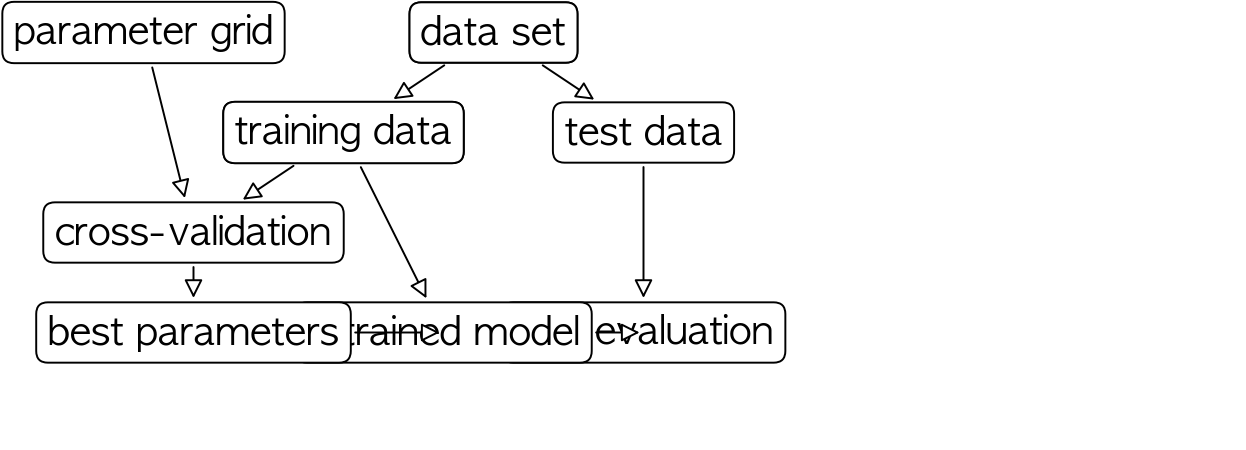

In [23]:
mglearn.plots.plot_grid_search_overview()

In [24]:
param_grid = {"C": [0.001, 0.01, 0.1, 1, 10, 100], 
              "gamma": [0.001, 0.01, 0.1, 1, 10, 100]}

In [25]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=0)

In [27]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [28]:
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

Test set score: 0.97


In [29]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best CV score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 100, 'gamma': 0.01}
Best CV score: 0.97


In [30]:
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Best estimator:
SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [31]:
results = pd.DataFrame(grid_search.cv_results_)
(results.head())

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_gamma,params,rank_test_score,split0_test_score,split0_train_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.000598,0.000231,0.366071,0.366079,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",22,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000202,0.000051,0.011371,0.002852
1,0.000490,0.000200,0.366071,0.366079,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",22,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000018,0.000012,0.011371,0.002852
2,0.002091,0.000778,0.366071,0.366079,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",22,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.002074,0.001103,0.011371,0.002852
3,0.000906,0.000435,0.366071,0.366079,0.001,1,"{'C': 0.001, 'gamma': 1}",22,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000327,0.000342,0.011371,0.002852
4,0.000531,0.000244,0.366071,0.366079,0.001,10,"{'C': 0.001, 'gamma': 10}",22,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000097,0.000075,0.011371,0.002852


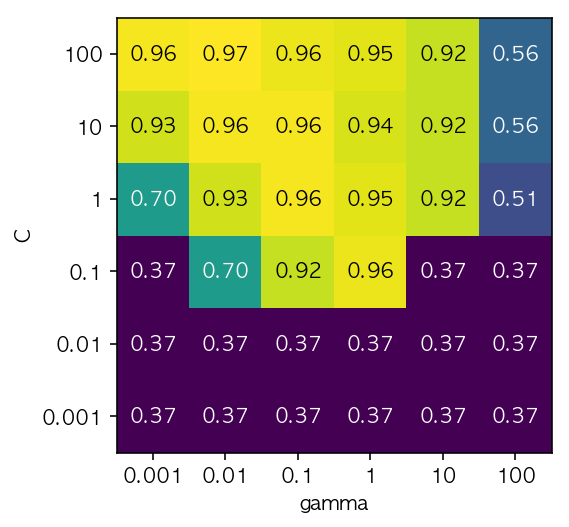

In [32]:
scores = np.array(results.mean_test_score).reshape(6, 6)

mglearn.tools.heatmap(scores, xlabel="gamma", xticklabels=param_grid["gamma"], 
                      ylabel="C", yticklabels=param_grid["C"], cmap="viridis")

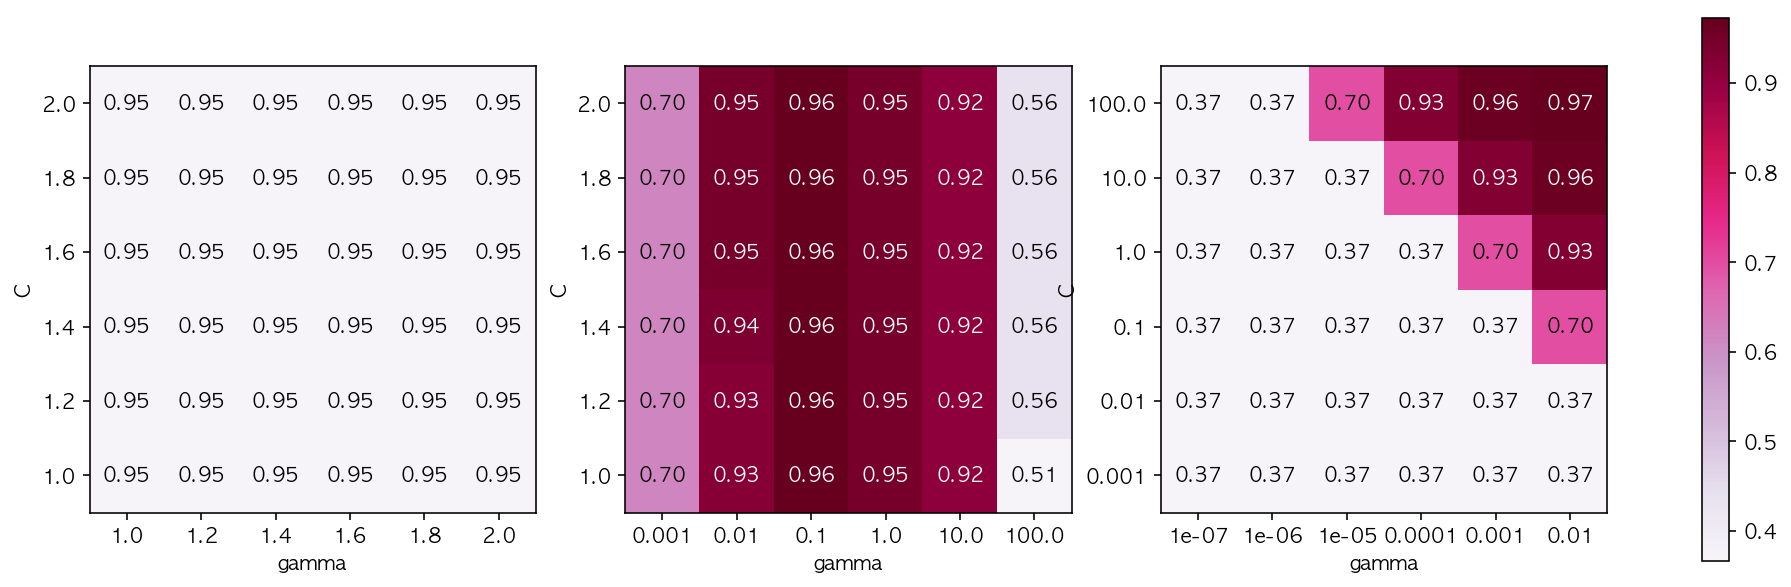

In [33]:
fig, axes = plt.subplots(1, 3, figsize=(17, 5))
param_grid_linear = {"C": np.linspace(1, 2, 6), 
                     "gamma": np.linspace(1, 2, 6)}
param_grid_one_log = {"C": np.linspace(1, 2, 6), 
                      "gamma": np.logspace(-3, 2, 6)}
param_grid_range = {"C": np.logspace(-3, 2, 6), 
                    "gamma": np.logspace(-7, -2, 6)}

for param_grid, ax in zip([param_grid_linear, param_grid_one_log, 
                           param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    scores = grid_search.cv_results_["mean_test_score"].reshape(6, 6)
    
    scores_image = mglearn.tools.heatmap(
        scores, xlabel="gamma", ylabel="C", xticklabels=param_grid["gamma"], 
        yticklabels=param_grid["C"], cmap="PuRd", ax=ax)
    
plt.colorbar(scores_image, ax=axes.tolist())    

In [34]:
param_grid = [{"kernel": ["rbf"], 
              "C": [0.001, 0.01, 0.1, 1, 10, 100], 
              "gamma": [0.001, 0.01, 0.1, 1, 10, 100]}, 
              {"kernel": ["linear"], 
               "C": [0.001, 0.01, 0.1, 1, 10, 100]}]

In [35]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best CV score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best CV score: 0.97


In [36]:
results = pd.DataFrame(grid_search.cv_results_)
results.head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_gamma,param_kernel,params,rank_test_score,split0_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.001205,0.000371,0.366071,0.366079,0.001,0.001,rbf,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}",27,0.375,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.001032,0.000168,0.011371,0.002852
1,0.000460,0.000184,0.366071,0.366079,0.001,0.01,rbf,"{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}",27,0.375,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000017,0.000007,0.011371,0.002852
2,0.000451,0.000198,0.366071,0.366079,0.001,0.1,rbf,"{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}",27,0.375,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000009,0.000030,0.011371,0.002852
3,0.000974,0.000339,0.366071,0.366079,0.001,1,rbf,"{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}",27,0.375,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000850,0.000213,0.011371,0.002852
4,0.000692,0.000612,0.366071,0.366079,0.001,10,rbf,"{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}",27,0.375,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000239,0.000812,0.011371,0.002852


In [37]:
param_grid = {"C": [0.001, 0.01, 0.1, 1, 10, 100], 
              "gamma": [0.001, 0.01, 0.1, 1, 10, 100]}
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5), 
                         iris.data, iris.target, cv=5)
print("CV score: ", scores)
print("Average CV score: ", scores.mean())

CV score:  [ 0.96666667  1.          0.96666667  0.96666667  1.        ]
Average CV score:  0.98


In [50]:
def nested_cv(X, y, inner_cv, outer_cv, Classifier, parameter_grid):
    outer_scores = []
    for training_samples, test_samples in outer_cv.split(X, y):
        best_params = {}
        best_score = -np.inf
        for parameters in parameter_grid:
            cv_scores = []
            for inner_train, inner_test in inner_cv.split(
                X[training_samples], y[training_samples]):
                clf = Classifier(**parameters)
                clf.fit(X[inner_train], y[inner_train])
                score = clf.score(X[inner_test], y[inner_test])
                cv_scores.append(score)
            mean_score = np.mean(cv_scores)
            if mean_score > best_score:
                best_score = mean_score
                best_params = parameters
                
        clf = Classifier(**best_params)
        clf.fit(X[training_samples], y[training_samples])
        outer_scores.append(clf.score(X[test_samples], y[test_samples]))
    return np.array(outer_scores)

In [51]:
from sklearn.model_selection import ParameterGrid, StratifiedKFold
scores = nested_cv(iris.data, iris.target, StratifiedKFold(5), 
                   StratifiedKFold(5), SVC, ParameterGrid(param_grid))
print("CV scores: {}".format(scores))

CV scores: [ 0.96666667  1.          0.96666667  0.96666667  1.        ]


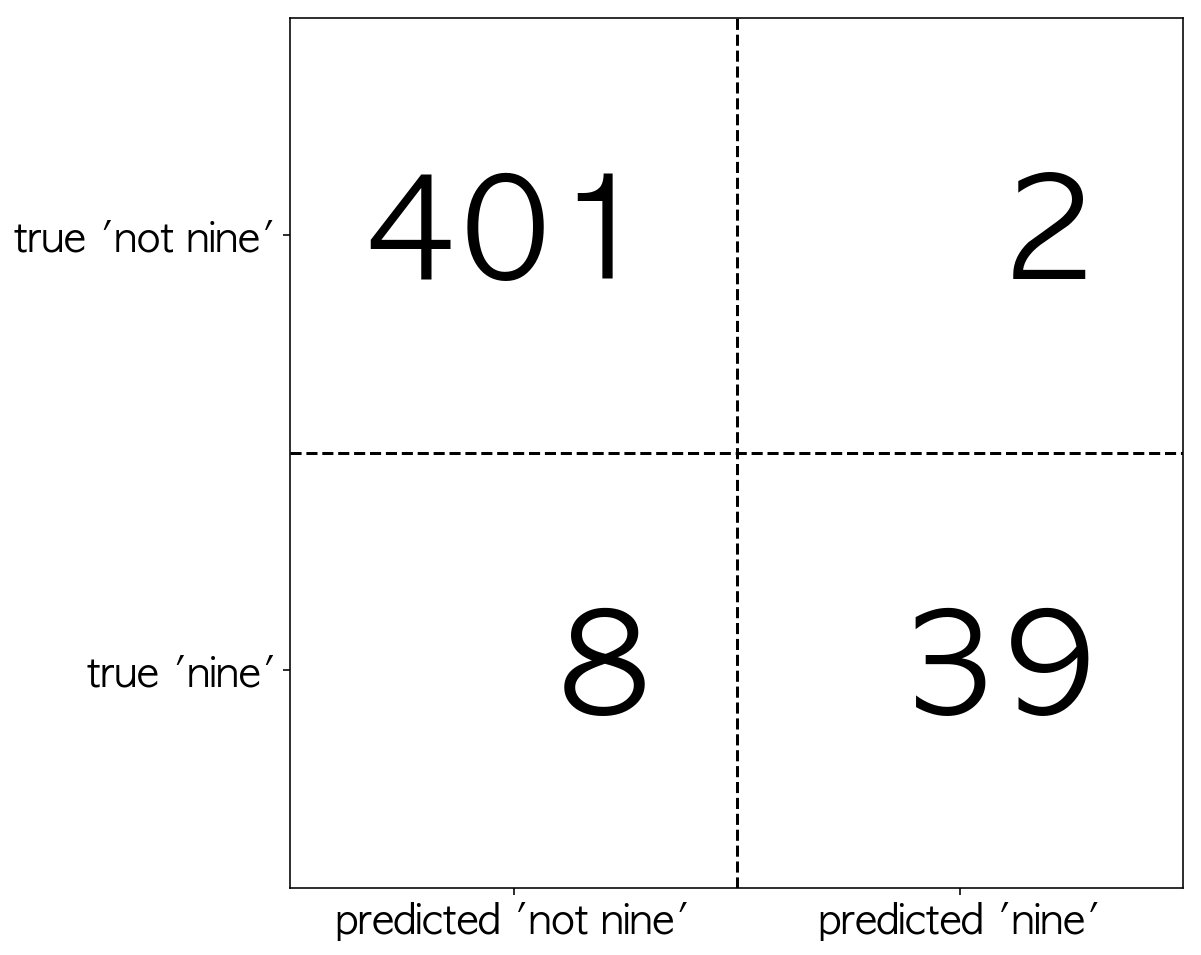

In [52]:
mglearn.plots.plot_confusion_matrix_illustration()

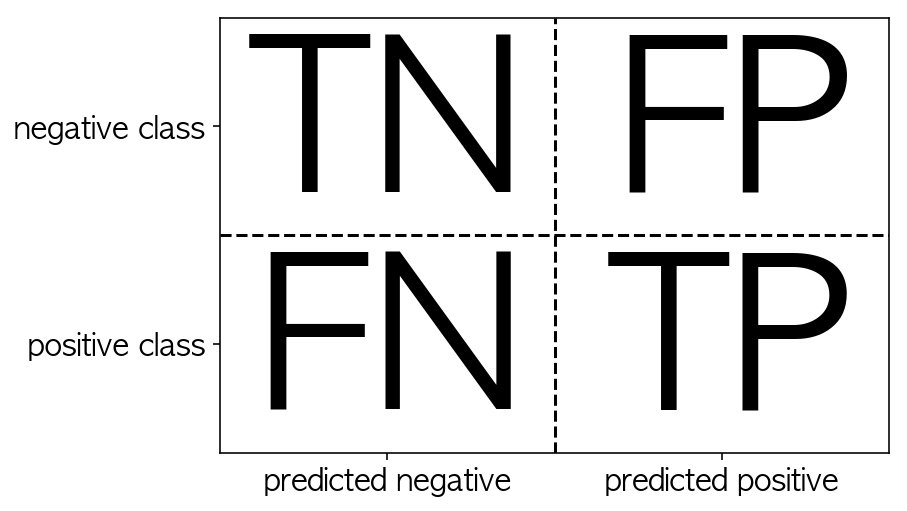

In [53]:
mglearn.plots.plot_binary_confusion_matrix()